In [231]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/Data(24.03.12)/data(use)/data(0401)/train_data.csv")

data_row

,Unnamed: 0,word,predict
0,203848,걸,fishing
1,172011,벌,fishing
2,155125,때,fishing
3,200050,확인,fishing
4,112212,대도,fishing
...,...,...,...
209236,109034,연구,fishing
209237,179352,예,fishing
209238,105159,전시,No fishing
209239,21263,부합,No fishing


In [232]:
data_row.isnull().sum()

Unnamed: 0    0
word          0
predict       0
dtype: int64

In [233]:
data_row.drop(columns=["Unnamed: 0"],inplace=True)

In [234]:
data_row

,word,predict
0,걸,fishing
1,벌,fishing
2,때,fishing
3,확인,fishing
4,대도,fishing
...,...,...
209236,연구,fishing
209237,예,fishing
209238,전시,No fishing
209239,부합,No fishing


In [235]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [236]:
print(data_row.iloc[1,0]==data_row.iloc[2,0])

False


In [237]:
A=le.fit_transform(data_row['word'])

In [238]:
A.dtype

dtype('int64')

In [239]:
for i in range(data_row.shape[0]):
    data_row.iloc[i,0]=A[i]

In [240]:
data=data_row

In [241]:
A=le.fit_transform(data['predict'])

In [242]:
data

,word,predict
0,255,fishing
1,2351,fishing
2,1687,fishing
3,6845,fishing
4,1403,fishing
...,...,...
209236,3948,fishing
209237,4053,fishing
209238,5088,No fishing
209239,2598,No fishing


In [243]:
A

array([1, 1, 1, ..., 0, 0, 0])

In [244]:
for i in range(data.shape[0]):
    data.iloc[i,1]=A[i]

In [245]:
data

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [246]:
import matplotlib.pyplot as plt
import numpy as np

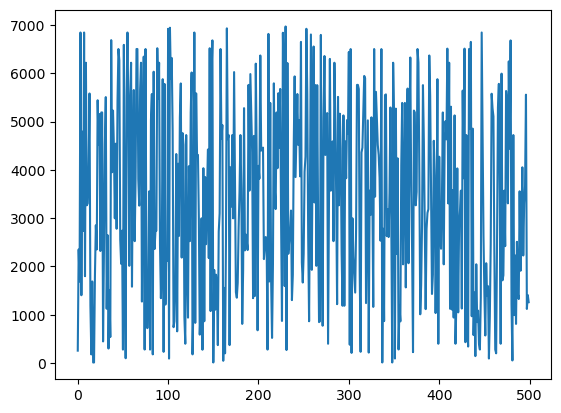

In [247]:
plt.plot(data['word'][:500])

In [248]:
data

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [249]:
data2=data

In [250]:
data2

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [251]:
data_2=pd.DataFrame(index=range(0,15000),columns=['word','predict'])

In [252]:
#from sklearn.preprocessing import StandardScaler

#scaler=StandardScaler()
#data_2=pd.DataFrame(scaler.fit_transform(data2),columns=['word','predict'])

In [253]:
#data_2

In [254]:
for i in range(data_2.shape[0]):
    data_2.iloc[i,0]=data.iloc[i,0]
    data_2.iloc[i,1]=data.iloc[i,1]

In [255]:
#data_2

In [256]:
data=data_2

In [257]:
data.astype('int32').dtypes

word       int32
predict    int32
dtype: object

In [258]:
x_train=pd.DataFrame(data=data['word'],columns=['word'])

In [259]:
x_train

,word
0,255
1,2351
2,1687
3,6845
4,1403
...,...
14995,2024
14996,5010
14997,5647
14998,3549


In [260]:

y_train=pd.DataFrame(data=data['predict'],columns=['predict'],copy=True)

In [261]:

y_train

,predict
0,1
1,1
2,1
3,1
4,1
...,...
14995,0
14996,1
14997,1
14998,1


In [262]:

x_train.astype('int32').dtypes
y_train.astype('int32').dtypes


predict    int32
dtype: object

In [263]:
data=x_train

In [264]:
target=y_train

In [265]:
import numpy as np
from sklearn.model_selection import train_test_split

In [266]:
x_train['word']=x_train['word'].astype(float)
y_train['predict']=y_train['predict'].astype(float)

In [267]:
x_train,x_valid,y_train,y_valid=train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target)

In [268]:
print(x_train.dtypes)
print(y_train.dtypes)
print(x_valid.dtypes)

word    float64
dtype: object
predict    float64
dtype: object
word    float64
dtype: object


In [269]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


def objective(trial):
    
    dense_par=trial.suggest_int("dense_par",100,200)
    eta=trial.suggest_float("eta",0,1)
    gamma=trial.suggest_int("gamma",0,100)
    max_depth=trial.suggest_int("max_depth",0,100)
    min_child_weight=trial.suggest_int("min_child_weight",0,100)
    max_delta_step=trial.suggest_int("max_delta_step",0,100)
    subsample=trial.suggest_float("subsample",0,1)
    learning_rate=trial.suggest_float("learning_rate",0,1)
    n_estimators=trial.suggest_int("n_estimators",0,200)
    alpha=trial.suggest_int("alpha",0,100)
    
    model = XGBClassifier(
        eta=eta,gamma=gamma,max_depth=max_depth,min_child_weight=min_child_weight,max_delta_step=max_delta_step,subsample=subsample,alpha=alpha,
        learning_rate=learning_rate,n_estimators=n_estimators
    )
    
    #model.summary()
    
    
    model.fit(x_train,y_train)
    y_pred = pd.DataFrame(model.predict(x_valid),columns=['predict'])
    
    return accuracy_score(y_valid,y_pred)*100

study = optuna.create_study()
study.optimize(objective, n_trials=100)

best_params=study.best_params
print(best_params)
study.best_value

[I 2024-04-01 13:28:36,715] A new study created in memory with name: no-name-ca258be1-dc45-47f4-ae7b-3f3e5903e95c
[I 2024-04-01 13:28:36,799] Trial 0 finished with value: 51.83333333333333 and parameters: {'dense_par': 136, 'eta': 0.1727711546967413, 'gamma': 0, 'max_depth': 40, 'min_child_weight': 20, 'max_delta_step': 0, 'subsample': 0.26319095505313683, 'learning_rate': 0.05976829130977268, 'n_estimators': 168, 'alpha': 67}. Best is trial 0 with value: 51.83333333333333.
[I 2024-04-01 13:28:36,851] Trial 1 finished with value: 51.83333333333333 and parameters: {'dense_par': 126, 'eta': 0.5806717019645781, 'gamma': 93, 'max_depth': 85, 'min_child_weight': 13, 'max_delta_step': 44, 'subsample': 0.5413356704580105, 'learning_rate': 0.9016140059647799, 'n_estimators': 174, 'alpha': 83}. Best is trial 0 with value: 51.83333333333333.
[I 2024-04-01 13:28:36,871] Trial 2 finished with value: 51.83333333333333 and parameters: {'dense_par': 182, 'eta': 0.5748394041258281, 'gamma': 75, 'max_d

{'dense_par': 136, 'eta': 0.1727711546967413, 'gamma': 0, 'max_depth': 40, 'min_child_weight': 20, 'max_delta_step': 0, 'subsample': 0.26319095505313683, 'learning_rate': 0.05976829130977268, 'n_estimators': 168, 'alpha': 67}


51.83333333333333